# Movie Data Analysis

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import zipfile
import matplotlib.pyplot as plt

In [2]:
# upzip im.db.zip file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    zipObj.extractall(path='./zippedData/')
    

In [3]:
con = sqlite3.connect('zippedData/im.db')
cursor = con.cursor()


In [4]:
# check table names
schema_df = pd.read_sql("""
                        SELECT *
                        FROM sqlite_master """, con)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Trying to find if there is any correlations between the budgets and ratings of the movies. There are three data frames I need, movie_raitng and movie_basics from im.db database as well as the budget from tn.movie_budgets.csv.gz.

In [5]:

df_rating = pd.read_sql("""
                        SELECT *
                        FROM movie_ratings """, con)
df_rating.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
df_basics = pd.read_sql("""
                        SELECT 
                            movie_id
                        FROM movie_basics""", con)
df_basics.head()

,movie_id
0,tt0063540
1,tt0066787
2,tt0069049
3,tt0069204
4,tt0100275


In [7]:
# Join two tables together, with both movie_id, movie name and averagerating
movie_titles_rating = pd.read_sql("""
                                    SELECT 
                                        movie_ratings.movie_id, movie_basics.primary_title AS movie, movie_ratings.averagerating 
                                    FROM 
                                        movie_ratings
                                        INNER JOIN movie_basics
                                            ON movie_ratings.movie_id = movie_basics.movie_id
                                    
                                    """, con)
movie_titles_rating.head(50)

,movie_id,movie,averagerating
0,tt10356526,Laiye Je Yaarian,8.3
1,tt10384606,Borderless,8.9
2,tt1042974,Just Inès,6.4
3,tt1043726,The Legend of Hercules,4.2
4,tt1060240,Até Onde?,6.5
5,tt1069246,Habana Eva,6.2
6,tt1094666,The Hammer,7.0
7,tt1130982,The Night Clerk,6.4
8,tt1156528,Silent Sonata,7.2
9,tt1161457,Vanquisher,4.2


Now I have a clean table to check both movie name and it corresponding rating. Next, I'm going to join this table with budget info.

In [8]:
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [10]:
# df_budgets.sort_values(by='production_budget')

In [11]:
# df_budgets['production_budget'][0][0]

In [12]:
budget_rating_df = pd.merge(movie_titles_rating,df_budgets, on='movie')
budget_rating_df.head(50)

,movie_id,movie,averagerating,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt1043726,The Legend of Hercules,4.2,42,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319"
1,tt1094666,The Hammer,7.0,50,"Mar 21, 2008","$850,000","$442,638","$442,638"
2,tt3096900,The Hammer,6.5,50,"Mar 21, 2008","$850,000","$442,638","$442,638"
3,tt1171222,Baggage Claim,5.1,38,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836"
4,tt1210166,Moneyball,7.6,15,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835"
5,tt1212419,Hereafter,6.5,61,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270"
6,tt1232829,21 Jump Street,7.2,44,"Mar 16, 2012","$42,000,000","$138,447,667","$202,812,429"
7,tt1243974,Aloha,5.4,3,"May 29, 2015","$37,000,000","$21,052,030","$25,387,091"
8,tt1261945,Sex and the City 2,4.4,16,"May 27, 2010","$95,000,000","$95,347,692","$294,680,778"
9,tt1270761,Don't Be Afraid of the Dark,5.6,43,"Aug 26, 2011","$25,000,000","$24,046,682","$39,126,427"


In [13]:
budget_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 8 columns):
movie_id             2875 non-null object
movie                2875 non-null object
averagerating        2875 non-null float64
id                   2875 non-null int64
release_date         2875 non-null object
production_budget    2875 non-null object
domestic_gross       2875 non-null object
worldwide_gross      2875 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 202.1+ KB


In [16]:
""""fig, ax = plt.subplots()
ax.scatter(x=budget_rating_df['budgets'], y=budget_rating_df['averagerating'])
ax.set_xlabel('budgets (USD)')
ax.set_ylabel('averagerating')"""

'"fig, ax = plt.subplots()\nax.scatter(x=budget_rating_df[\'budgets\'], y=budget_rating_df[\'averagerating\'])\nax.set_xlabel(\'budgets (USD)\')\nax.set_ylabel(\'averagerating\')'

## Clean Budgets Table

In [17]:
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [18]:
"""All the numbers in this table need to be converted to integers"""

df_budgets['budgets(USD)'] = df_budgets['production_budget'].str.replace('$','').str.replace(',', '').astype(int)
df_budgets['dom_gross(USD)'] = df_budgets['domestic_gross'].str.replace('$','').str.replace(',', '').astype(int)
df_budgets['world_gross(USD)'] = df_budgets['worldwide_gross'].str.replace('$','').str.replace(',', '').astype('int64')

In [19]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budgets(USD),dom_gross(USD),world_gross(USD)
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,620181382,1316721747


In [20]:
# keep the int columns only
budget_clean = df_budgets.drop(['production_budget','domestic_gross','worldwide_gross'], axis=1)

In [21]:
budget_clean.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD)
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


## Join movie_basics and budget_clean

In [22]:
# load movie_basics from the database
df_basics = pd.read_sql("""
                        SELECT 
                            movie_id, primary_title AS movie, genres, runtime_minutes
                        FROM 
                            movie_basics """, con)

In [ ]:
df_basics.loc[df_basics['movie']=='Avatar']

In [23]:
#
movie_budget = budget_clean.merge(df_basics, on='movie')

In [24]:
movie_budget.head(50)

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0
5,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,"Action,Adventure,Fantasy",120.0
6,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,tt2379713,"Action,Adventure,Thriller",148.0
7,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,tt1345836,"Action,Thriller",164.0
8,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,tt3778644,"Action,Adventure,Fantasy",135.0
9,13,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,tt1210819,"Action,Adventure,Western",150.0


In [25]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 9 columns):
id                  3815 non-null int64
release_date        3815 non-null object
movie               3815 non-null object
budgets(USD)        3815 non-null int32
dom_gross(USD)      3815 non-null int32
world_gross(USD)    3815 non-null int64
movie_id            3815 non-null object
genres              3743 non-null object
runtime_minutes     3328 non-null float64
dtypes: float64(1), int32(2), int64(2), object(4)
memory usage: 268.2+ KB


In [ ]:
# check nan in genres
# movie_budget.loc[movie_budget['genres'].isna()]

In [26]:
# add a new column "Estimated Profit"
movie_budget['Estimated Profit'] = movie_budget['world_gross(USD)']-movie_budget['budgets(USD)']

In [27]:
movie_budget.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0,1072413963
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200


## Join directors and persons

In [28]:
df_directors = pd.read_sql("""
                        SELECT 
                            *
                        FROM 
                            directors """, con)
df_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [29]:
df_person = pd.read_sql("""
                        SELECT 
                            *
                        FROM 
                            persons """, con)
df_person.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [31]:
director_df = pd.read_sql("""
                            SELECT
                                d.movie_id, p.primary_name AS director_name
                            FROM 
                                directors AS d
                                INNER JOIN persons AS p
                                    ON d.person_id = p.person_id
                                """, con)
director_df.head()

,movie_id,director_name
0,tt0285252,Tony Vitale
1,tt0462036,Bill Haley
2,tt0835418,Jay Chandrasekhar
3,tt0835418,Jay Chandrasekhar
4,tt0878654,Albert Pyun


In [ ]:
director_df.info()

In [32]:
movie_df = movie_budget.merge(director_df, on='movie_id', how='inner')

In [33]:
movie_df.drop_duplicates(subset='movie_id',keep='first', inplace=True)

In [34]:
movie_clean_df = movie_df.drop_duplicates(subset='movie',keep='first')

In [35]:
movie_clean_df.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit,director_name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,2351345279,Atsushi Wada
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0,635063875,Rob Marshall
7,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,-200237650,Simon Kinberg
13,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0,1072413963,Joss Whedon
18,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200,Anthony Russo


In [36]:
movie_clean_df['Estimated Profit'] = movie_clean_df['world_gross(USD)']-movie_clean_df['budgets(USD)']

C:\Users\YueYu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
movie_clean_df.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit,director_name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,2351345279,Atsushi Wada
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0,635063875,Rob Marshall
7,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,-200237650,Simon Kinberg
13,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0,1072413963,Joss Whedon
18,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200,Anthony Russo


In [38]:
#check what types of genre are in this table.
movie_clean_df['genres'].unique()

array(['Horror', 'Action,Adventure,Fantasy', 'Action,Adventure,Sci-Fi',
       'Action,Adventure,Thriller', 'Action,Thriller',
       'Action,Adventure,Western', 'Adventure,Animation,Comedy',
       'Adventure,Family,Fantasy', 'Adventure,Fantasy',
       'Action,Crime,Thriller', 'Action,Adventure,Comedy',
       'Action,Adventure,Drama', 'Action,Adventure', 'Adventure',
       'Action,Adventure,Animation', 'Action,Adventure,Horror',
       'Drama,Romance', 'Comedy,Drama,Family', 'Drama,Mystery,Sci-Fi',
       'Adventure,Comedy,Family', 'Action,Adventure,Family',
       'Adventure,Drama,Family', 'Action,Horror,Sci-Fi', 'Action,Sci-Fi',
       'Animation', 'Crime,Drama', 'Adventure,Drama,Sci-Fi',
       'Drama,Fantasy,Romance', 'Action,Drama,History',
       'Adventure,Drama,Sport', 'Action,Drama,Fantasy',
       'Comedy,Fantasy,Horror', 'Action,Drama,Thriller',
       'Drama,Fantasy,Horror', 'Adventure,Animation,Family',
       'Adventure,Animation,Drama', 'Action,Comedy,Fantasy',
     

In [ ]:
#movie_clean_df['genres'].str.split(',').value_counts()

In [39]:
# a list of the top 10 genres that appear most frequently in this table
top_10_genres = movie_clean_df['genres'].value_counts()[:10]

In [40]:
top_10_genres

Drama                         190
Documentary                    94
Comedy                         82
Comedy,Drama                   73
Adventure,Animation,Comedy     68
Comedy,Drama,Romance           66
Drama,Romance                  58
Action,Adventure,Sci-Fi        55
Action,Crime,Drama             48
Horror                         47
Name: genres, dtype: int64

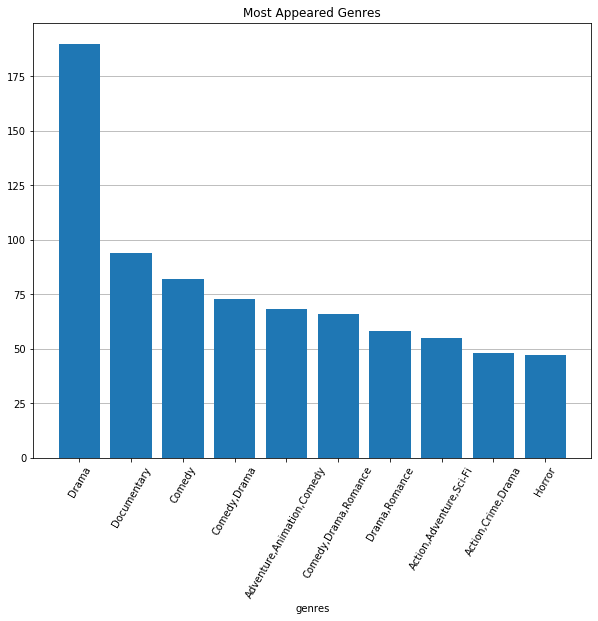

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(x=top_10_genres.index, height=top_10_genres,zorder=3)
ax.set_xlabel('genres')
ax.set_title('Most Appeared Genres')
ax.grid(axis='y', zorder=0)
plt.xticks(rotation=60);

In [42]:
movie_clean_df.sort_values(by=['Estimated Profit'],ascending=False)[:100]

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit,director_name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,2351345279,Atsushi Wada
177,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,tt2495766,Adventure,NaN,2008208395,Pete Meads
18,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200,Anthony Russo
142,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,tt0369610,"Action,Adventure,Sci-Fi",124.0,1433854864,Colin Trevorrow
272,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,tt2820852,"Action,Crime,Thriller",137.0,1328722794,James Wan
123,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,tt0848228,"Action,Adventure,Sci-Fi",143.0,1292935897,Joss Whedon
173,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,tt1825683,"Action,Adventure,Sci-Fi",134.0,1148258224,Ryan Coogler
470,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,tt4881806,"Action,Adventure,Sci-Fi",128.0,1135772799,J.A. Bayona
670,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,tt1323045,"Adventure,Drama,Sport",93.0,1122469910,Adam Green
579,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,tt2316801,"Drama,Fantasy,Romance",112.0,1099199706,Christophe Gans


In [43]:
#the genres of top 100 profitable movies
profit_genres = movie_clean_df.sort_values(by=['Estimated Profit'], ascending=False)['genres'][:100]
profit_genres

0                           Horror
177                      Adventure
18         Action,Adventure,Sci-Fi
142        Action,Adventure,Sci-Fi
272          Action,Crime,Thriller
123        Action,Adventure,Sci-Fi
173        Action,Adventure,Sci-Fi
470        Action,Adventure,Sci-Fi
670          Adventure,Drama,Sport
579          Drama,Fantasy,Romance
1911    Adventure,Animation,Comedy
13         Action,Adventure,Sci-Fi
180     Action,Adventure,Animation
198        Action,Adventure,Sci-Fi
599       Action,Adventure,Fantasy
111          Action,Crime,Thriller
1842    Adventure,Animation,Comedy
382        Action,Adventure,Sci-Fi
255        Action,Adventure,Sci-Fi
220      Action,Adventure,Thriller
1794     Adventure,Animation,Drama
1830    Adventure,Animation,Comedy
149        Action,Adventure,Sci-Fi
77         Action,Adventure,Sci-Fi
1494       Action,Adventure,Comedy
681     Adventure,Animation,Comedy
194     Adventure,Animation,Comedy
181        Action,Adventure,Sci-Fi
2375         Biograp

In [44]:
pop_gen_ls = ['Act,Adv,Sci','Adv,Anim,Com','Act,Adv,Fan','Act,Adv,Com','Act,Adv,Anim','Adv,Fam,Fan','Act,Crim,Thri','Anim,Com, Fam',
             'Act,Adv,Thri','Adv,Dram,Sci']

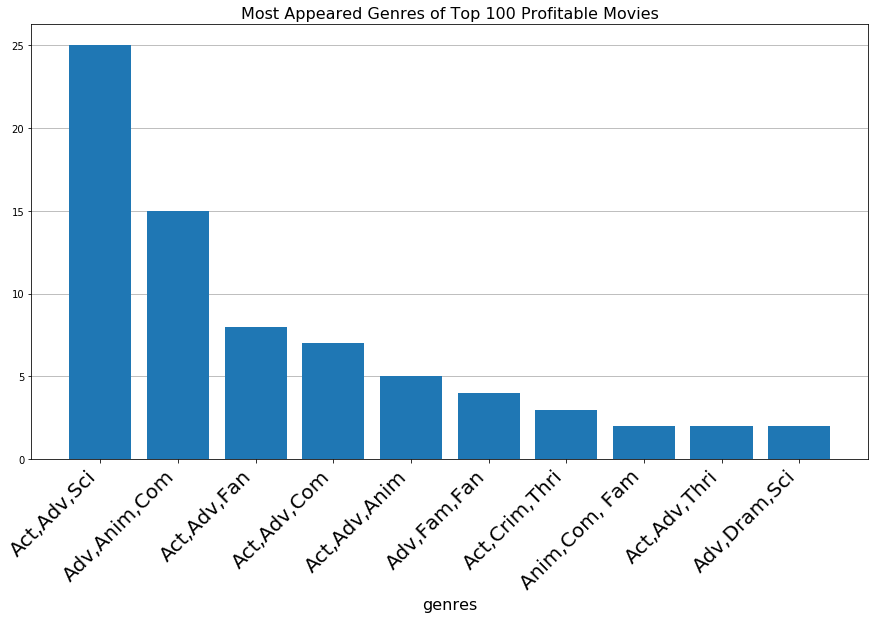

In [45]:

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x=profit_genres.value_counts()[:10].index, height=profit_genres.value_counts()[:10], zorder=3)
ax.set_xlabel('genres', fontsize=16)
plt.xticks(np.arange(0,10),fontsize=20,rotation=45,labels=pop_gen_ls,ha='right')
ax.set_title('Most Appeared Genres of Top 100 Profitable Movies', fontsize=16)
ax.grid(axis='y', zorder=0)
plt.show()
fig.savefig('most_appeared_genres.png',bbox_inches='tight');

In [46]:
genres = profit_genres.value_counts()[:10].index
#df.loc[df['col name'].isin(ls_conditions)]

In [47]:
top_profit_movie_genres = movie_clean_df.loc[movie_clean_df['genres'].isin(genres)]
top_profit_movie_genres

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit,director_name
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0,635063875,Rob Marshall
7,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,-200237650,Simon Kinberg
13,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0,1072413963,Joss Whedon
18,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200,Anthony Russo
42,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,"Action,Adventure,Fantasy",120.0,355945209,Zack Snyder
61,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,tt3778644,"Action,Adventure,Fantasy",135.0,118151347,Ron Howard
67,14,"Mar 9, 2012",John Carter,275000000,73058679,282778100,tt0401729,"Action,Adventure,Sci-Fi",132.0,7778100,Andrew Stanton
71,15,"Nov 24, 2010",Tangled,260000000,200821936,586477240,tt0398286,"Adventure,Animation,Comedy",100.0,326477240,Nathan Greno
77,17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1140069413,tt3498820,"Action,Adventure,Sci-Fi",147.0,890069413,Anthony Russo
89,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,tt2975590,"Action,Adventure,Fantasy",151.0,617500281,Zack Snyder


In [48]:
profit_genres_ls = top_profit_movie_genres.groupby('genres')['budgets(USD)'].apply(list)
type(profit_genres_ls['Action,Adventure,Animation'][0])

int

In [ ]:
#drama_mean_budget = top_profit_movie.loc[top_profit_movie['genres']=='Drama']['budgets(USD)'].mean()
#top_profit_movie.loc[top_profit_movie['genres']=='Action,Adventure,Comedy']['budgets(USD)'].mean()

In [ ]:
#profit_genres_ls.mean()

In [49]:
profit_genres_ls = top_profit_movie_genres.groupby('genres')
mean_budgets = profit_genres_ls.mean()['budgets(USD)']
mean_budgets

genres
Action,Adventure,Animation    1.151471e+08
Action,Adventure,Comedy       8.505000e+07
Action,Adventure,Fantasy      1.415886e+08
Action,Adventure,Sci-Fi       1.649164e+08
Action,Crime,Thriller         5.904167e+07
Adventure,Animation,Comedy    9.811029e+07
Adventure,Drama,Sci-Fi        1.060000e+08
Adventure,Family,Fantasy      1.354000e+08
Adventure,Fantasy             2.316667e+08
Animation,Comedy,Family       5.521429e+07
Name: budgets(USD), dtype: float64

In [50]:
gen_ls = ['Act,Adv,Anim','Act,Adv,Com','Act,Adv,Fan','Act,Adv,Sic','Act,Adv,Thri','Act,Crim,Thri','Adv,Anim,Com',
         'Adv,Dram,Sci','Adv,Fam,Fan','Anim,Com,Fam']


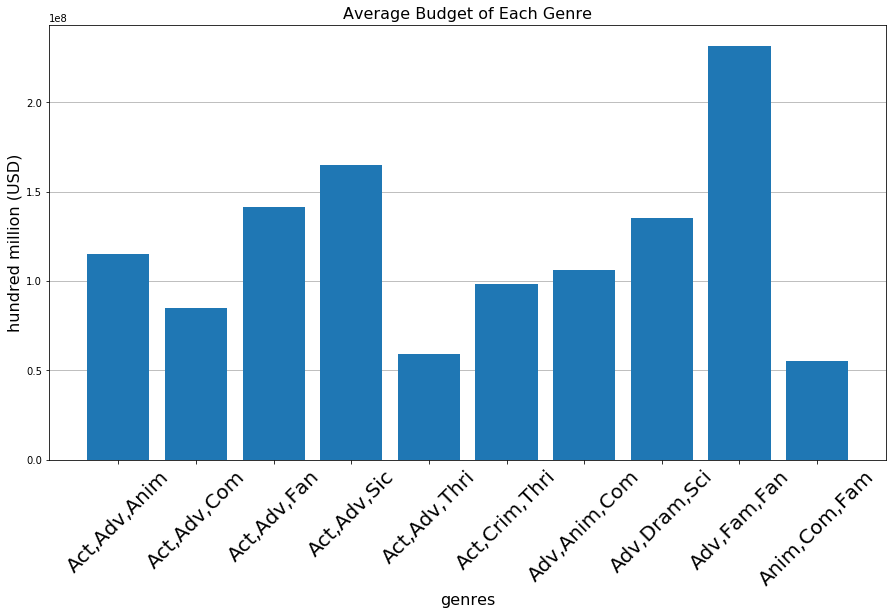

In [51]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x=profit_genres_ls.mean()['budgets(USD)'].index, height=mean_budgets, zorder=3)
ax.set_xlabel('genres', fontsize=16)

ax.set_ylabel('hundred million (USD)',fontsize=16)
plt.xticks(np.arange(0,10),fontsize=20,rotation=45,labels=gen_ls,ha='center')

ax.set_title('Average Budget of Each Genre', fontsize=16)
ax.grid(axis='y', zorder=0)
plt.show()
fig.savefig('Average_budget.png',bbox_inches='tight');